<a href="https://colab.research.google.com/github/dhanakakani/Dhana_INFO5502_Spring2022/blob/master/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing  the automated pyforest library
!pip install pyforest
import pyforest
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Importing metrics
from sklearn.metrics import roc_auc_score

In [3]:
#Below is the code reads the complete text file and also separate the labels such as Pos and Neg, and data 
from codecs import open
from __future__ import division

def read_documents(doc_file):
    docs = []
    labels = []
    with open(doc_file, encoding='utf-8') as f:
        for line in f:
            words = line.strip().split()
            docs.append(words[3:])
            labels.append(words[1])
    return docs, labels

In [4]:
from google.colab import files
uploading=files.upload()

Saving all_sentiment_shuffled (1).txt to all_sentiment_shuffled (1) (1).txt


In [5]:
all_docs, all_labels = read_documents("all_sentiment_shuffled (1).txt")


In [6]:
#Here I am just using pandas to convert the text file with help of other parameteres and also naming the labels and data  
df = pd.read_csv('all_sentiment_shuffled (1).txt',sep='.txt', names=['result','txt'])


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [7]:
df

,result,txt
0,music neg 241,i bought this album because i loved the title...
1,music neg 544,i was misled and thought i was buying the ent...
2,books neg 729,"i have introduced many of my ell , high schoo..."
3,books pos 278,anything you purchase in the left behind seri...
4,dvd pos 840,"i loved these movies , and i cant wiat for th..."
...,...,...
11909,dvd neg 53,the story here dose n't matter . the main cha...
11910,software pos 70,i liked everything about this product except ...
11911,camera pos 864,this flash is the perfect back-up for a studi...
11912,health neg 264,i had boughten this as a gift which turned ou...


In [8]:
#In the result column i am spliting the string to seperate labels such as neg and pos
df['result']=df['result'].str.split(' ').str[1]

In [9]:
df.result

0        neg
1        neg
2        neg
3        pos
4        pos
        ... 
11909    neg
11910    pos
11911    pos
11912    neg
11913    neg
Name: result, Length: 11914, dtype: object

In [10]:
df.isnull().sum()

result    0
txt       0
dtype: int64

In [11]:
#Here checking the frequency of each character in the document
from collections import Counter

example_documents = df['txt']

freqs1 = Counter()
for doc in example_documents:
    for w in doc:
        freqs1[w] += 1

freqs2 = Counter()
for doc in example_documents:
    freqs2.update(doc)

freqs3 = Counter(w for doc in example_documents for w in doc)

print(freqs1)
print(freqs1['the'])
print(freqs1['neverseen'])

Counter({' ': 1794121, 'e': 797740, 't': 655306, 'a': 544958, 'o': 538743, 'i': 519515, 's': 459622, 'n': 443043, 'r': 398239, 'h': 348456, 'l': 286904, 'd': 250586, 'u': 205210, 'c': 195828, 'm': 177912, 'f': 145133, 'y': 145116, 'g': 143292, 'w': 132264, 'p': 132248, 'b': 114114, '.': 93134, 'v': 83015, ',': 66753, 'k': 62455, "'": 31493, '-': 16998, '"': 16347, 'x': 14115, 'j': 13250, '0': 9765, ')': 8094, '(': 7815, 'q': 7772, 'z': 7684, '!': 7085, '1': 6333, '2': 5237, '5': 3587, '3': 3208, ';': 2960, '?': 2957, ':': 2638, '9': 2533, '&': 2338, '4': 2241, '/': 2216, '7': 2017, '6': 1932, '8': 1904, '*': 1130, '$': 1061, '_': 902, '`': 378, '%': 313, '[': 268, ']': 247, '+': 209, '#': 182, '=': 67, '@': 56, '~': 50, 'é': 41, 'ï': 27, '½': 23, '¿': 21, 'ó': 15, 'á': 14, '^': 12, '{': 12, '}': 11, '\\': 9, 'Á': 8, 'è': 7, 'ç': 5, 'ü': 5, 'ã': 3, 'í': 3, 'à': 2, '¡': 2, '®': 1, '¼': 1, 'É': 1, '|': 1, 'ä': 1, 'ö': 1, 'ú': 1, 'ê': 1})
0
0


In [12]:
freqs1

Counter({' ': 1794121,
         '!': 7085,
         '"': 16347,
         '#': 182,
         '$': 1061,
         '%': 313,
         '&': 2338,
         "'": 31493,
         '(': 7815,
         ')': 8094,
         '*': 1130,
         '+': 209,
         ',': 66753,
         '-': 16998,
         '.': 93134,
         '/': 2216,
         '0': 9765,
         '1': 6333,
         '2': 5237,
         '3': 3208,
         '4': 2241,
         '5': 3587,
         '6': 1932,
         '7': 2017,
         '8': 1904,
         '9': 2533,
         ':': 2638,
         ';': 2960,
         '=': 67,
         '?': 2957,
         '@': 56,
         '[': 268,
         '\\': 9,
         ']': 247,
         '^': 12,
         '_': 902,
         '`': 378,
         'a': 544958,
         'b': 114114,
         'c': 195828,
         'd': 250586,
         'e': 797740,
         'f': 145133,
         'g': 143292,
         'h': 348456,
         'i': 519515,
         'j': 13250,
         'k': 62455,
         'l': 286904,
     

In [13]:
#Here I am taking y as dependent feature where we predict if the word is pos or neg
y=df.result

In [14]:
y

0        neg
1        neg
2        neg
3        pos
4        pos
        ... 
11909    neg
11910    pos
11911    pos
11912    neg
11913    neg
Name: result, Length: 11914, dtype: object

In [15]:
#Import nltk and downloading stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
#Defining stopset words to 'english'
stopset = set(stopwords.words('english'))

In [17]:
#Here I am importing TfidVectorizer for text featue extraction from sklearn to convert the text data
#In the below code I am vectorizing the charaters into matrix array that would be used build the model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True,lowercase=True, strip_accents='ascii',stop_words=stopset)
x=vectorizer.fit_transform(df.txt)

In [18]:
x

<11914x47135 sparse matrix of type '<class 'numpy.float64'>'
	with 649379 stored elements in Compressed Sparse Row format>

In [19]:
print(x.shape)
print(y.shape)

(11914, 47135)
(11914,)


In [20]:
#Here I am splitting the data into 80:20 and setting random state as 5
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 5)

<IPython.core.display.Javascript object>

In [21]:
#Importing the model
from sklearn.naive_bayes import MultinomialNB

In [22]:
#defining the model
mod = MultinomialNB()

In [23]:
#Fitting the model with train data
mod.fit(x_train,y_train)

MultinomialNB()

In [24]:
#kf for cross validation of the data
kf = KFold(n_splits = 7, shuffle=True, random_state = 5)

<IPython.core.display.Javascript object>

In [25]:
#Deriving the score for all the 7 splits
score = cross_val_score(mod,x_train,y_train,cv=kf)
score

<IPython.core.display.Javascript object>

array([0.82232012, 0.82745962, 0.80910426, 0.81938326, 0.81337252,
       0.82880235, 0.8104335 ])

In [26]:
#Find the average score for 7 splits
avg_score = score.mean()
avg_score

0.8186965186045934

In [27]:
#Below checking the score for train data
mod.score(x_train,y_train)

0.9351589549889833

In [28]:
#Below checking the score for test data
mod.score(x_test,y_test)

0.8271086865295846

In [29]:
#Predicting the labels
pr = mod.predict(x_test)
pr

array(['pos', 'pos', 'pos', ..., 'pos', 'neg', 'neg'], dtype='<U3')

In [30]:
#Below i am checking the label while we give a sentance
word = np.array(["not working"])

In [31]:
#Vectorizing the word
word_vector = vectorizer.transform(word)

In [32]:
#Obtaining the label for the sentance
print(mod.predict(word_vector))

['neg']


In [33]:
word = np.array(["welcome to money"])

In [34]:
word_vector = vectorizer.transform(word)

In [35]:
print(mod.predict(word_vector))

['pos']


<IPython.core.display.Javascript object>

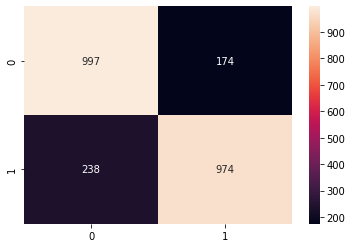

In [36]:
#Defining the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pr)

sns.heatmap(cm,annot=True,fmt='d')